In [183]:
import pandas as pd

In [184]:
train = pd.read_csv("../data/raw_data/train.csv")
test = pd.read_csv("../data/raw_data/test.csv")

In [185]:
train.head()

,ID,SUBCLASS,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,TRAIN_0000,KIPAN,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,TRAIN_0001,SARC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2,TRAIN_0002,SKCM,R895R,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,TRAIN_0003,KIRC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,TRAIN_0004,GBMLGG,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [186]:
train = train.drop(columns = ['ID'])
test = test.drop(columns = ['ID'])

In [187]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['SUBCLASS'] = le.fit_transform(train['SUBCLASS'])

In [188]:
le.classes_

array(['ACC', 'BLCA', 'BRCA', 'CESC', 'COAD', 'DLBC', 'GBMLGG', 'HNSC',
       'KIPAN', 'KIRC', 'LAML', 'LGG', 'LIHC', 'LUAD', 'LUSC', 'OV',
       'PAAD', 'PCPG', 'PRAD', 'SARC', 'SKCM', 'STES', 'TGCT', 'THCA',
       'THYM', 'UCEC'], dtype=object)

In [189]:
train[test.columns] = train[test.columns].map(lambda x:0 if x == 'WT' else 1)
test[test.columns] = test[test.columns].map(lambda x:0 if x == 'WT' else 1)

In [190]:
train[train.isna( ).any(axis=1)]

,SUBCLASS,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX


In [191]:
test[test.isna().any(axis=1)]

,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX


---

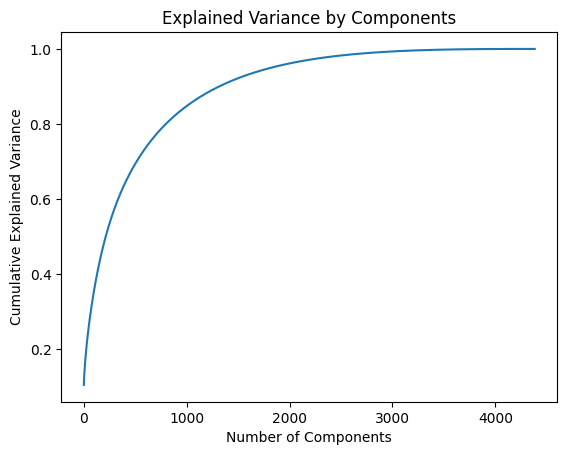

In [245]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA 모델 생성
pca = PCA()
pca.fit(train.drop(columns=['SUBCLASS'], axis=1))  # X는 4386개의 컬럼을 가진 데이터

# 설명된 분산의 비율 누적 계산
explained_variance = pca.explained_variance_ratio_.cumsum()

# 시각화
plt.plot(explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.show()

In [247]:
pca = PCA(n_components=2500)
reduced_data = pca.fit_transform(train.drop(columns=['SUBCLASS'], axis=1))

In [249]:
reduced_data = pd.DataFrame(reduced_data)
reduced_data['SUBCLASS'] = train['SUBCLASS']

In [250]:
X = reduced_data.drop(columns=['SUBCLASS'], axis=1)
y = reduced_data['SUBCLASS']

In [251]:
from sklearn.model_selection import train_test_split

In [252]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [253]:
from sklearn.svm import SVC

In [254]:
model = SVC()
model.fit(x_train, y_train)

SVC()

In [255]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [256]:
# 테스트 데이터로 예측
y_pred = model.predict(x_test)

In [257]:
# 평가
# 1. 정확도 (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.31


In [258]:
# 2. 혼동 행렬 (confusion matrix)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[  6   0   2   0   0   0   0   0   5   0   0   0   0   0   0   0   0   0
    0   0   5   3   0   0   0   0]
 [  0   0   6   0   0   0   0   0   3   0   0   0   0   0   0   0   0   0
    0   0  12  17   0   0   0   0]
 [  0   0 203   0   0   0   3   0   0   0   0   0   0   0   0   0   0   0
    0   0   8  14   0   0   0   0]
 [  0   0  28   0   0   0   1   0   4   0   0   0   0   0   0   0   0   0
    0   0   3  10   0   0   0   0]
 [  0   0   8   0  32   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   9   2   0   0   0   0]
 [  0   0   6   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0
    0   0   3   1   0   0   0   0]
 [  0   0  53   0   1   0  93   0   4   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   1   0   0]
 [  0   0  33   0   1   0   0   1   3   0   0   0   0   0   0   1   0   0
    0   0   5  32   0   0   0   0]
 [  0   0  71   0   2   0   0   0  53   2   0   0   0   0   0   0   0   0
    0   0   1   3   0   0   0   0]
 

In [259]:
# 3. 분류 보고서 (classification report)
# precision, recall, f1-score 등을 포함한 상세 성능 보고서
class_report = classification_report(y_test, y_pred, target_names=le.classes_)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

         ACC       1.00      0.29      0.44        21
        BLCA       0.00      0.00      0.00        38
        BRCA       0.21      0.89      0.33       228
        CESC       0.00      0.00      0.00        46
        COAD       0.68      0.63      0.65        51
        DLBC       0.00      0.00      0.00        12
      GBMLGG       0.53      0.61      0.57       152
        HNSC       0.50      0.01      0.03        76
       KIPAN       0.33      0.40      0.36       132
        KIRC       0.00      0.00      0.00        89
        LAML       1.00      0.17      0.29        58
         LGG       0.00      0.00      0.00        72
        LIHC       0.00      0.00      0.00        48
        LUAD       0.00      0.00      0.00        54
        LUSC       0.00      0.00      0.00        50
          OV       0.00      0.00      0.00        85
        PAAD       0.00      0.00      0.00        39
    

C:\Users\insu\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\insu\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\insu\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [263]:
reduced_test = pca.transform(test)

In [265]:
test_predict = model.predict(reduced_test)

In [268]:
test_predict = le.inverse_transform(test_predict)

In [269]:
submission = pd.read_csv("../data/raw_data/sample_submission.csv")

In [271]:
submission['SUBCLASS'] = test_predict

In [274]:
submission.to_csv("../data/submission/submission_01.csv", index=False)